# Completeness relation using numerical bound and continuum states

The completeness relation (CR) of a numerical basis set made of bound and continuum states will be studied, just as in the analytical case.

Two test functions will be used: one with or without an initial momentum.

## Initialization

The outline is not very different from the analytical case: one needs to import some modules and classes, create a basis set (here, made of numerical eigenstates of a Hamiltonian), define a test function and then use the `plot_completeness_convergence` method of the basis set.

### Import modules and classes

You should now be acquainted with all the SiegPy classes required for this notebook:

In [1]:
from siegpy import (SWPotential, SWPBasisSet, Gaussian,
                    Hamiltonian, UniformCoordMap, BasisSet)
# We also import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Define a potential

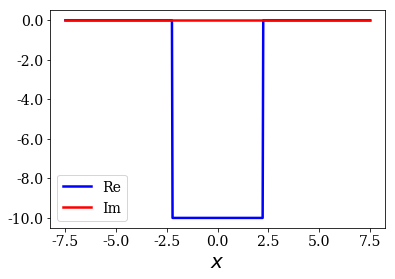

In [2]:
# Read the analytical basis set made of Siegert states
siegerts = SWPBasisSet.from_file("siegerts.dat")

# Find its potential, and discretize it over a grid
pot = siegerts.potential
l = pot.width
xmax = 7.5
xgrid = np.linspace(-xmax, xmax, 501)
pot.grid = xgrid
pot.plot()

### Solve a Hamiltonian to create a basis set

In [3]:
# Initialize the coordinate mapping $F: x \mapsto x$ 
cm = UniformCoordMap(0)

# Initialize the Hamiltonian
ham = Hamiltonian(pot, cm)

# Solve it to create a basis set
basis = ham.solve()

## Test function without initial momentum

The completeness relation of the numerical basis set amde of bound and continuum state will first be tested against a test function without an initial momentum.

### Definition of the test function

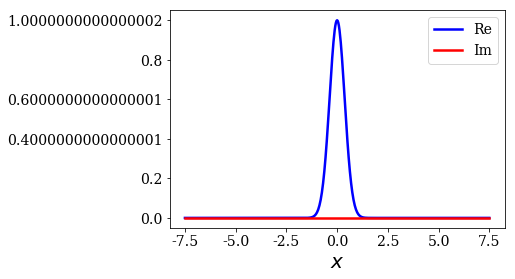

In [4]:
g = Gaussian(l/12, 0, grid=xgrid)
g.plot()

### Plot the convergence of the completeness relation

The convergence of the CR can be plotted by using the `plot_completeness_convergence` method. The range of wavenumbers can be limited by setting `xlim`.

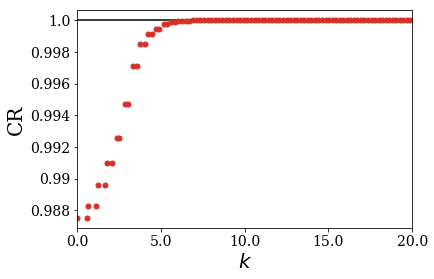

In [5]:
basis.plot_completeness_convergence(g, klim=(0, 20))

### Comparison with the analytical results

The data used to create the previous plot can be retrieved by applying the `completeness_convergence` method. The analytical result is obtained in the same manner (using the analytical basis set created from a file at the beginning of the notebook), for both analytical and numerical results to be compared. The convergence of the analytical Mittag-Leffler expansion (MLE) is also reported, as a reminder.

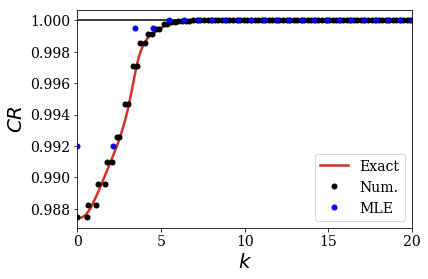

In [6]:
# Use all the numerical eigenstates
kgrid_num, CR_conv_num = basis.completeness_convergence(g)
# Use only a limited number of Siegert states to find the analytical MLE of the CR
kgrid_MLE, CR_conv_MLE = siegerts.MLE_completeness_convergence(g, nres=25)
# Use only a limited range of continuum states for the exact CR
kgrid_exact, CR_conv_exact = siegerts.exact_completeness_convergence(g, hk=0.05, kmax=20)
# Set the plot
plt.axhline(1, lw=1.5, color='k')
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_num, np.real(CR_conv_num), label='Num.', ls='', marker='.', ms=10, color='k')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='MLE', ls='', marker='.', ms=10, color='b')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend()
plt.show()

The numerical results are comparable to the analytical ones. Note that it requires more continuum than resonant states to reach the completeness of the basis set for this test function.

**Note:**

Using a smaller grid step would increase the density of continuum states above the threshold energy (*i.e.*, 0).

## Test function with initial momentum

The second test function is the same as the previous one, save for the initial momentum, that is not 0. The test function therefore becomes complex.

### Definition of the test function

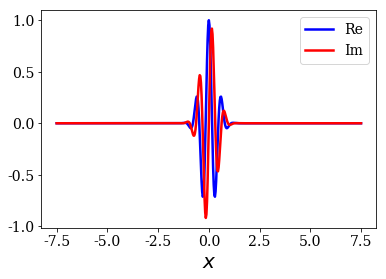

In [7]:
g_k0 = Gaussian(l/12, 0, k0=10, grid=xgrid)
g_k0.plot()

### Comparison with the analytical results

Let us directly compare the numerical and analytical results:

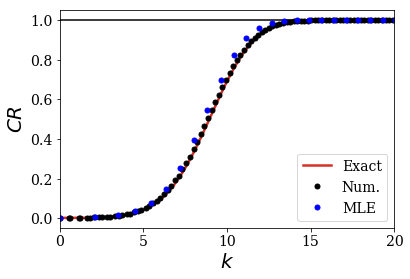

In [8]:
# Use only a limited number of Siegert states to find the analytical MLE of the CR
kgrid_MLE, CR_conv_MLE = siegerts.MLE_completeness_convergence(g_k0, nres=25)
# Use only a limited range of continuum states for the exact CR
kgrid_exact, CR_conv_exact = siegerts.exact_completeness_convergence(g_k0, hk=0.05, kmax=20)
# Use all the numerical eigenstates
kgrid_num, CR_conv_num = basis.completeness_convergence(g_k0)
# Set the plot
plt.axhline(1, lw=1.5, color='k')
plt.plot(kgrid_exact, np.real(CR_conv_exact), label='Exact', color='#d73027')
plt.plot(kgrid_num, np.real(CR_conv_num), label='Num.', ls='', marker='.', ms=10, color='k')
plt.plot(kgrid_MLE, np.real(CR_conv_MLE), label='MLE', ls='', marker='.', ms=10, color='b')
plt.xlabel("$k$")
plt.ylabel("$CR$")
plt.xlim(0, 20)
plt.legend()
plt.show()

Again, both analytical and numerical completeness relation are comparable, even for a complex test function.

## Conclusion

The completeness of a numerical basis set is studied in a very similar manner as that of an analytical basis set: the same procedure, if not the same objects and methods, are used in both cases.

This allows to show that the numerical continuum states (that actually form a discrete basis set) reproduce the analytical results.